In [1]:
#Name: Sanjana Pradhan
#email id: sanjp1@umbc.edu

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as ml

In [2]:
# A) Assemble a dataframe with one row per customer and the following columns:
#     * customer_id
#     * gender
#     * most_recent_order_date
#     * order_count (number of orders placed by this customer)
#    Sort the dataframe by customer_id ascending and display the first 10 rows.

# For this question since there was no column describing the number of orders, I made an assumption that the 
# occurence of a specific customer_id would represent the number of times that customer made a purchase. I used the
# count of customer_id to count the number of orders.


df = pd.read_csv(r"C:\Users\SANJANA\Downloads\orders_v201810.csv")
df.head(10)
cols = [1,2,3,4,5,6]
df1 = df[["customer_id","gender"]]
order_date = df.groupby('customer_id').max()['date']
order_date.head(10)
df2 = pd.DataFrame(data=order_date)
df2.head(10)
df3 = pd.merge(df1, df2, on='customer_id', how='left')
df3['order_count'] = df3.groupby('customer_id')['customer_id'].transform('count')
df3.head(10)
df4 = df3.rename(columns=({'date':'most_recent_order_date'}))
df4.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


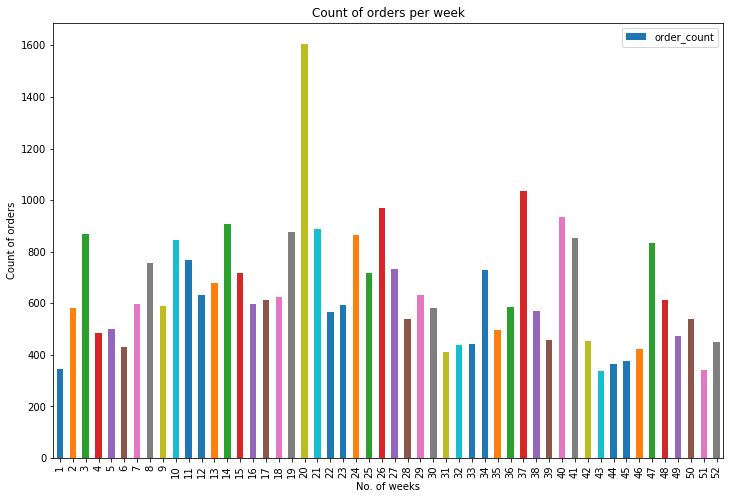

In [3]:
#B) Plot the count of orders per week.

# For this question I used the "date" column, converted it to weeks and "order_count" column obtained in the previous 
# question.

df4 = df3.loc[:, ["order_count"]]
df4["week_no"] = pd.to_datetime(df["date"]).dt.week
df5 = (
    df4
    .groupby("week_no")
    .sum()
    .reset_index()
)
ml.rcParams['figure.figsize'] = [12, 8]
fig = df5.plot.bar(x="week_no", y="order_count")
fig.set_title('Count of orders per week')
fig.set_xlabel('No. of weeks')
fig.set_ylabel('Count of orders')
ml.show()

In [4]:
#C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

#The difference between mean value for gender 0 and gender 1 is 13.89 USD approximately which is not very significant.

gender0 = df['gender'] != 1
mean_for_gender_0 = df.loc[gender0, 'value'].mean()

gender1 = df['gender'] != 0
mean_for_gender_1 = df.loc[gender1, 'value'].mean()

print (mean_for_gender_0)
print (mean_for_gender_1)

363.89000591803506
350.70836114422


In [5]:
#D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. 
#What does the confusion matrix tell you about the quality of the predictions?

# In the confusion matrix given below, for predictor variable gender 0, TP is 3349, FP is 3410, FN is 1463, TN is 5249.
# Error rate is 0.36 which can be reduced.(0 being the best error rate)
# Accuracy is 0.63 which still can be improved.
# So the overall quality of predictions can still be improved.

from sklearn.metrics import confusion_matrix
y_true = df['gender']
y_pred = df['predicted_gender']
confusion_matrix(y_true, y_pred)

array([[3349, 3410],
       [1463, 5249]], dtype=int64)

In [6]:
#E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. 
# Limit your answer to one paragraph.

In [7]:
#There are several tools and techniques to address real-time problems in the domain of Data Science. 
#I would love to talk about a Classification technique that I used to make predictions and inferences 
#about community health. I obtained a dataset from Centers for Disease Control and Prevention for the 
#year 2015 providing key health indicators (e.g., obesity, heart disease, cancer) of local communities 
#for all 3142 counties of US.I applied several Data Preprocessing techniques. The case in interest I decided 
#to explore was “leading causes of Death”. I picked up Cancer, and I was interested in finding underlying 
#patterns and attributes that might directly or indirectly relate to high or low value for predictor variable 
#“Cancer” at a county-level. I applied Bayesian Network classification technique to the dataset, since Probabilistic 
#graphical models (PGM) are helpful in capturing conditional and causal dependencies unlike Naïve Bayesian. 
#The dataset was split into training data (66%) and test data (34%). The learning model was built in WEKA using 
#BayesNet classifier. The model could correctly classify the instances with an accuracy of 93.45%. The model 
#captured a direct correlation between Obesity, High blood pressure and smoker attributes with respect to Cancer 
#variable. I could infer that these attributes are positively correlated. I could make inferences that these findings 
#supports my hypothesis which stated prevalence or absence of certain demographic, social, economic and/or 
#accessibility factors attribute to a particular kind of death in a certain county. I found out that certain 
#demographic factors attribute to high level of Cancer in a county.